In [1]:
import pandas as pd
import numpy as np

In [47]:
dataFrame = pd.read_csv("verilerist4.csv")

In [48]:
yuzdeDoksanDokuzDf = dataFrame.sort_values("Fiyatlar",ascending = False).iloc[118:]
yuzdeDoksanDokuzDf2 = yuzdeDoksanDokuzDf.sort_values("Fiyatlar",ascending= True).iloc[118:]
son2 = yuzdeDoksanDokuzDf2.sort_values("Metrekare",ascending= True).iloc[118:]
son3 = son2.sort_values("Metrekare",ascending= False).iloc[118:]
dataFrame = son3.sort_values("Yas",ascending= False).iloc[118:]
#Random forestin başarılı yanlarından biri kategorik verilerlede başa çıkabiliyor olması, dolayısıyla
#one hot encoding yapmadan devam edeceğiz.

In [5]:
!pip install tensorflow tensorflow_decision_forests

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 42.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 79.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 95.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 42.3 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.7.1
    Uninstalling typing_extensions-4.7.1:
      Successfully uninstalled typing_extensions-4.7.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorboard
    F

In [6]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
import numpy as np

def split_dataset(dataset, test_ratio=0.20):
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]

train_ds_pd, valid_ds_pd = split_dataset(dataFrame)

In [51]:
label = 'Fiyatlar'
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label, task = tfdf.keras.Task.REGRESSION)
valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_ds_pd, label=label, task = tfdf.keras.Task.REGRESSION)
 #Label kısmına hedef çıktının bulunduğu sütunu ekliyoruz.

In [52]:
rf = tfdf.keras.RandomForestModel(task = tfdf.keras.Task.REGRESSION)
rf.compile(metrics=["mse"])
#Random forest modelinin değiştirecek çok bir parametresi yok, default kullanıyoruz.

Use /tmp/tmp8d4f0oex as temporary training directory


In [53]:
rf.fit(x=train_ds)
#Modeli eğitiyoruz.

Reading training dataset...
Training dataset read in 0:00:00.510799. Found 9000 examples.
Training model...
Model trained in 0:01:51.919155
Compiling model...


Model compiled.


In [54]:
tfdf.model_plotter.plot_model_in_colab(rf, tree_idx=0, max_depth=3)
#Karar ağaçlarının nasıl oluşturulduğunu görselleştirebiliyoruz.

In [55]:
tahmin = rf.predict(valid_ds)
cikti = pd.DataFrame({'Tahmin': tahmin.squeeze()})
#Modele eğitmediğimiz test verimizi eğiterek data frame çerçevesine aktarıyoruzki görüntüleyelim.

3/3 [==============================] - 0s 82ms/step


In [56]:
valid_ds_pd.head()
#Test verimizi bir inceleyelim. Indexler dağınık halde daha önce sort işlemi yaptığımız için.
#Concat yaparken indexler sorun çıkaracağı için index resetleme yaparak yeni çerçevemizde birleştiriyoruz.

,Fiyatlar,Metrekare,Yas,Konum,Oda
4253,42000,160,55,"Beyoğlu,PürtelaşHasanEfendi Mahallesi",4 + 1
3062,140000,380,55,"Sarıyer,RumeliHisarı Mahallesi",5 + 1
10842,90000,99,55,"Adalar,Nizam Mahallesi",2 + 1
3545,18500,95,52,"Bakırköy,Ataköy3-4-11.Kısım Mahallesi",2 + 1
4708,15500,80,51,"Fatih,İskenderpaşa Mahallesi",1 + 1


In [57]:
tahminDf = pd.concat([cikti,valid_ds_pd.reset_index().Fiyatlar],axis=1)
#Test ve tahmin verisini birleştirdik.

In [58]:
tahminDf.head(50)
#Gözlemliyelim.

,Tahmin,Fiyatlar
0,41554.308594,42000
1,124225.875000,140000
2,93645.921875,90000
3,18416.210938,18500
4,16210.076172,15500
5,20353.505859,13000
6,24355.472656,30000
7,30612.466797,30000
8,19428.474609,10000
9,13283.515625,10000


<Axes: xlabel='Fiyatlar', ylabel='Tahmin'>

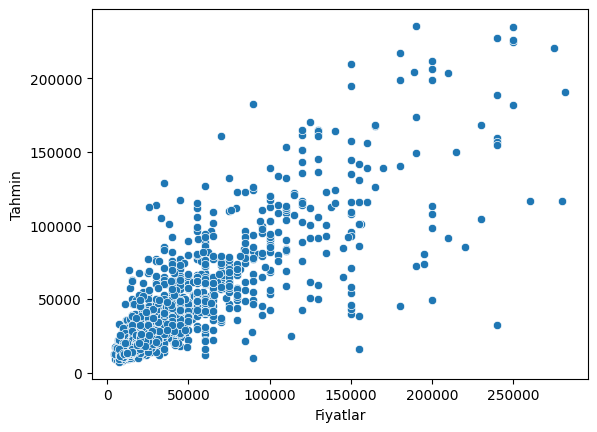

In [59]:
sns.scatterplot(x = "Fiyatlar", y = "Tahmin", data = tahminDf)

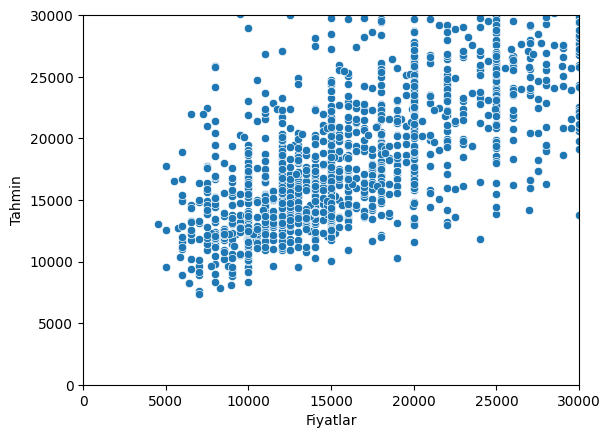

In [60]:
sns.scatterplot(x="Fiyatlar", y="Tahmin", data=tahminDf)

plt.xlim(0, 30000)
plt.ylim(0, 30000)

plt.show()


In [61]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [62]:
mean_absolute_error(tahminDf["Fiyatlar"],tahminDf["Tahmin"])

9888.284950600988

In [63]:
mean_squared_error(tahminDf["Fiyatlar"],tahminDf["Tahmin"])

384648285.2107498

In [64]:
from sklearn.metrics import r2_score
r2_skoru = r2_score(tahminDf["Fiyatlar"],tahminDf["Tahmin"])

print("R2 Skoru:", r2_skoru)

R2 Skoru: 0.7308363932140327


In [66]:
veri = {
    'Metrekare': [120],
    'Yas': [80],
    'Konum': ["Beyoğlu,Cihangir Mahallesi"],
    'Oda': ["2 + 1"]

}

# DataFrame'i oluşturalım
testt = pd.DataFrame(veri)
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(
    testt,
    task = tfdf.keras.Task.REGRESSION)

predss = rf.predict(test_ds)
predss
#Bu şekilde de istediğiniz veriyi girip tahmin yapabilirsiniz.

1/1 [==============================] - 0s 367ms/step


array([[38474.22]], dtype=float32)